# The problem is to predict anomaly based on the readings captured by sensors.+ Data is captured from various sensors from a energy manufacturing plant on specific time intervals. 
The problem is to predict anomaly based on the readings captured by sensors
 or 1) }s.


# Columns : {'Date': datetime64[ns]

+ 'X1' : reading from sensor one.
+ 'X2' : reading from sensor two.
+ 'X3' : reading from sensor three.
+ 'X4' : reading from sensor four.
+ 'X5' : reading from sensor five.
+ 'target' : Anomaly(0 or 1) }.

# 1. Importing necessary libraries

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the train data

In [5]:
df = pd.read_parquet("train.parquet")

In [6]:
df

,Date,X1,X2,X3,X4,X5,target
0,2020-12-16,1.518921,5.463154,1.0,2.718282,2.890372,0
1,2020-12-16,1.546509,5.458010,1.0,2.718282,2.833213,1
2,2020-12-16,1.645427,5.456560,1.0,7.389056,2.890372,1
3,2020-12-16,1.652022,5.458479,1.0,2.718282,2.890372,1
4,2020-12-16,1.695538,5.466709,1.0,2.718282,2.890372,0
...,...,...,...,...,...,...,...
1639419,2024-11-26,1.000000,5.482346,1.0,1.000000,0.000000,0
1639420,2024-11-26,1.000000,5.486580,1.0,1.000000,0.000000,0
1639421,2024-11-26,1.000000,5.484797,1.0,1.000000,0.000000,0
1639422,2024-11-26,1.000000,5.483551,1.0,1.000000,0.000000,0


In [7]:
datac = df.copy()

In [8]:
datac

,Date,X1,X2,X3,X4,X5,target
0,2020-12-16,1.518921,5.463154,1.0,2.718282,2.890372,0
1,2020-12-16,1.546509,5.458010,1.0,2.718282,2.833213,1
2,2020-12-16,1.645427,5.456560,1.0,7.389056,2.890372,1
3,2020-12-16,1.652022,5.458479,1.0,2.718282,2.890372,1
4,2020-12-16,1.695538,5.466709,1.0,2.718282,2.890372,0
...,...,...,...,...,...,...,...
1639419,2024-11-26,1.000000,5.482346,1.0,1.000000,0.000000,0
1639420,2024-11-26,1.000000,5.486580,1.0,1.000000,0.000000,0
1639421,2024-11-26,1.000000,5.484797,1.0,1.000000,0.000000,0
1639422,2024-11-26,1.000000,5.483551,1.0,1.000000,0.000000,0


In [9]:
df.shape

(1639424, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639424 entries, 0 to 1639423
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   Date    1639424 non-null  datetime64[ns]
 1   X1      1639424 non-null  float64       
 2   X2      1639424 non-null  float64       
 3   X3      1639424 non-null  float64       
 4   X4      1639424 non-null  float64       
 5   X5      1639424 non-null  float64       
 6   target  1639424 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 87.6+ MB


In [11]:
df.describe()

,Date,X1,X2,X3,X4,X5
count,1639424,1.639424e+06,1.639424e+06,1.639424e+06,1.639424e+06,1.639424e+06
mean,2022-12-03 07:23:43.817145600,1.139258e+00,5.488189e+00,4.110388e+32,2.706323e+29,1.187219e+00
min,2020-12-16 00:00:00,1.000000e+00,5.412539e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2021-12-10 00:00:00,1.049171e+00,5.480597e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,2022-11-30 00:00:00,1.105171e+00,5.488979e+00,1.000000e+00,1.000000e+00,6.931472e-01
75%,2023-11-23 00:00:00,1.214096e+00,5.496717e+00,1.000000e+00,2.718282e+00,2.890372e+00
max,2024-12-11 00:00:00,4.014850e+00,5.541852e+00,1.651636e+38,5.540622e+34,3.465736e+00
std,NaN,1.391992e-01,1.342811e-02,2.346156e+35,5.812988e+31,1.304814e+00


## checking for any null data

In [12]:
df.isnull().sum()

Date      0
X1        0
X2        0
X3        0
X4        0
X5        0
target    0
dtype: int64

In [13]:
df.memory_usage(deep=True)

Index          132
Date      13115392
X1        13115392
X2        13115392
X3        13115392
X4        13115392
X5        13115392
target    81971200
dtype: int64

In [14]:
df.dtypes

Date      datetime64[ns]
X1               float64
X2               float64
X3               float64
X4               float64
X5               float64
target            object
dtype: object

In [125]:
print(df['target'].unique())

[0 1]


In [127]:
df['target'] = df['target'].astype(int)
print(df['target'].dtypes)

int32


In [17]:
df.dtypes

Date      datetime64[ns]
X1               float64
X2               float64
X3               float64
X4               float64
X5               float64
target             int32
dtype: object

## Checking balance of data for both class labels

In [19]:
class_distribution = df.iloc[:, -1].value_counts()

In [20]:
class_distribution

target
0    1625386
1      14038
Name: count, dtype: int64

## Checking for duplicates

In [21]:
df.duplicated().sum()

57315

+ As we can see we are having 57315 we will see that if they are important or not and after that we will handle them

## Countplot for checking class distribution

C:\Users\ayush\AppData\Local\Temp\ipykernel_15652\1161728047.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


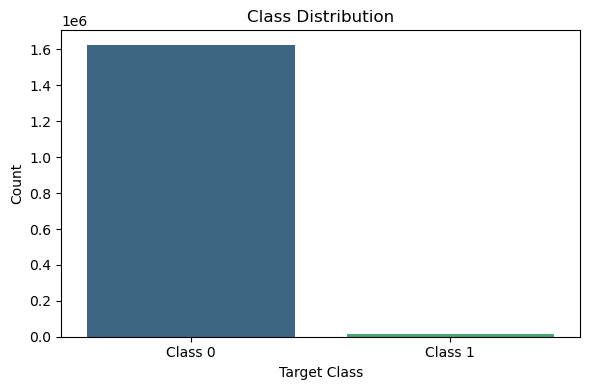

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.tight_layout()
plt.show()


## Checking relation between features

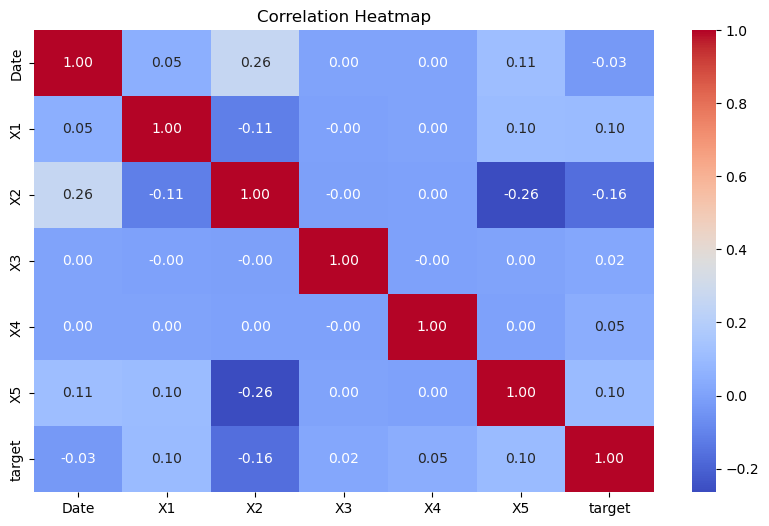

In [141]:
plt.figure(figsize=(10, 6))
sns.heatmap(datac.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


## Plotting histplot for each column to check their distribution

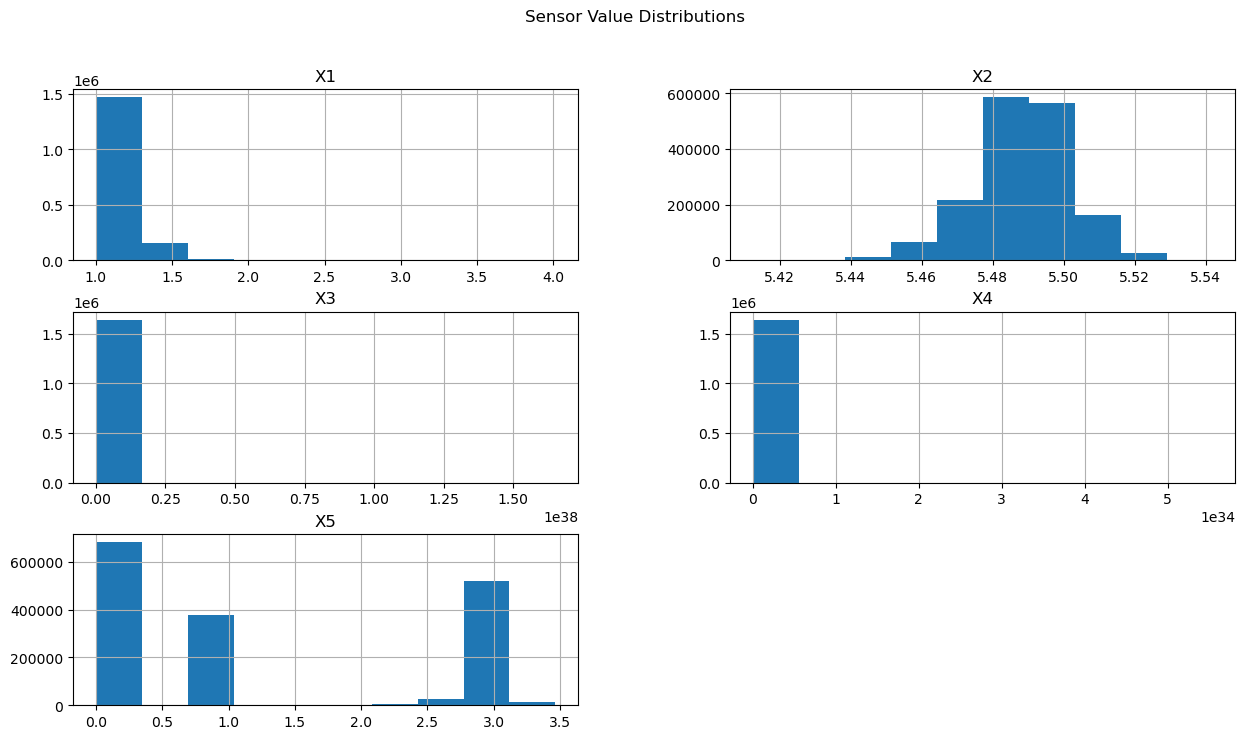

In [24]:
cols = ['X1', 'X2', 'X3', 'X4', 'X5']
df[cols].hist(figsize=(15, 8))
plt.suptitle("Sensor Value Distributions")
plt.show()

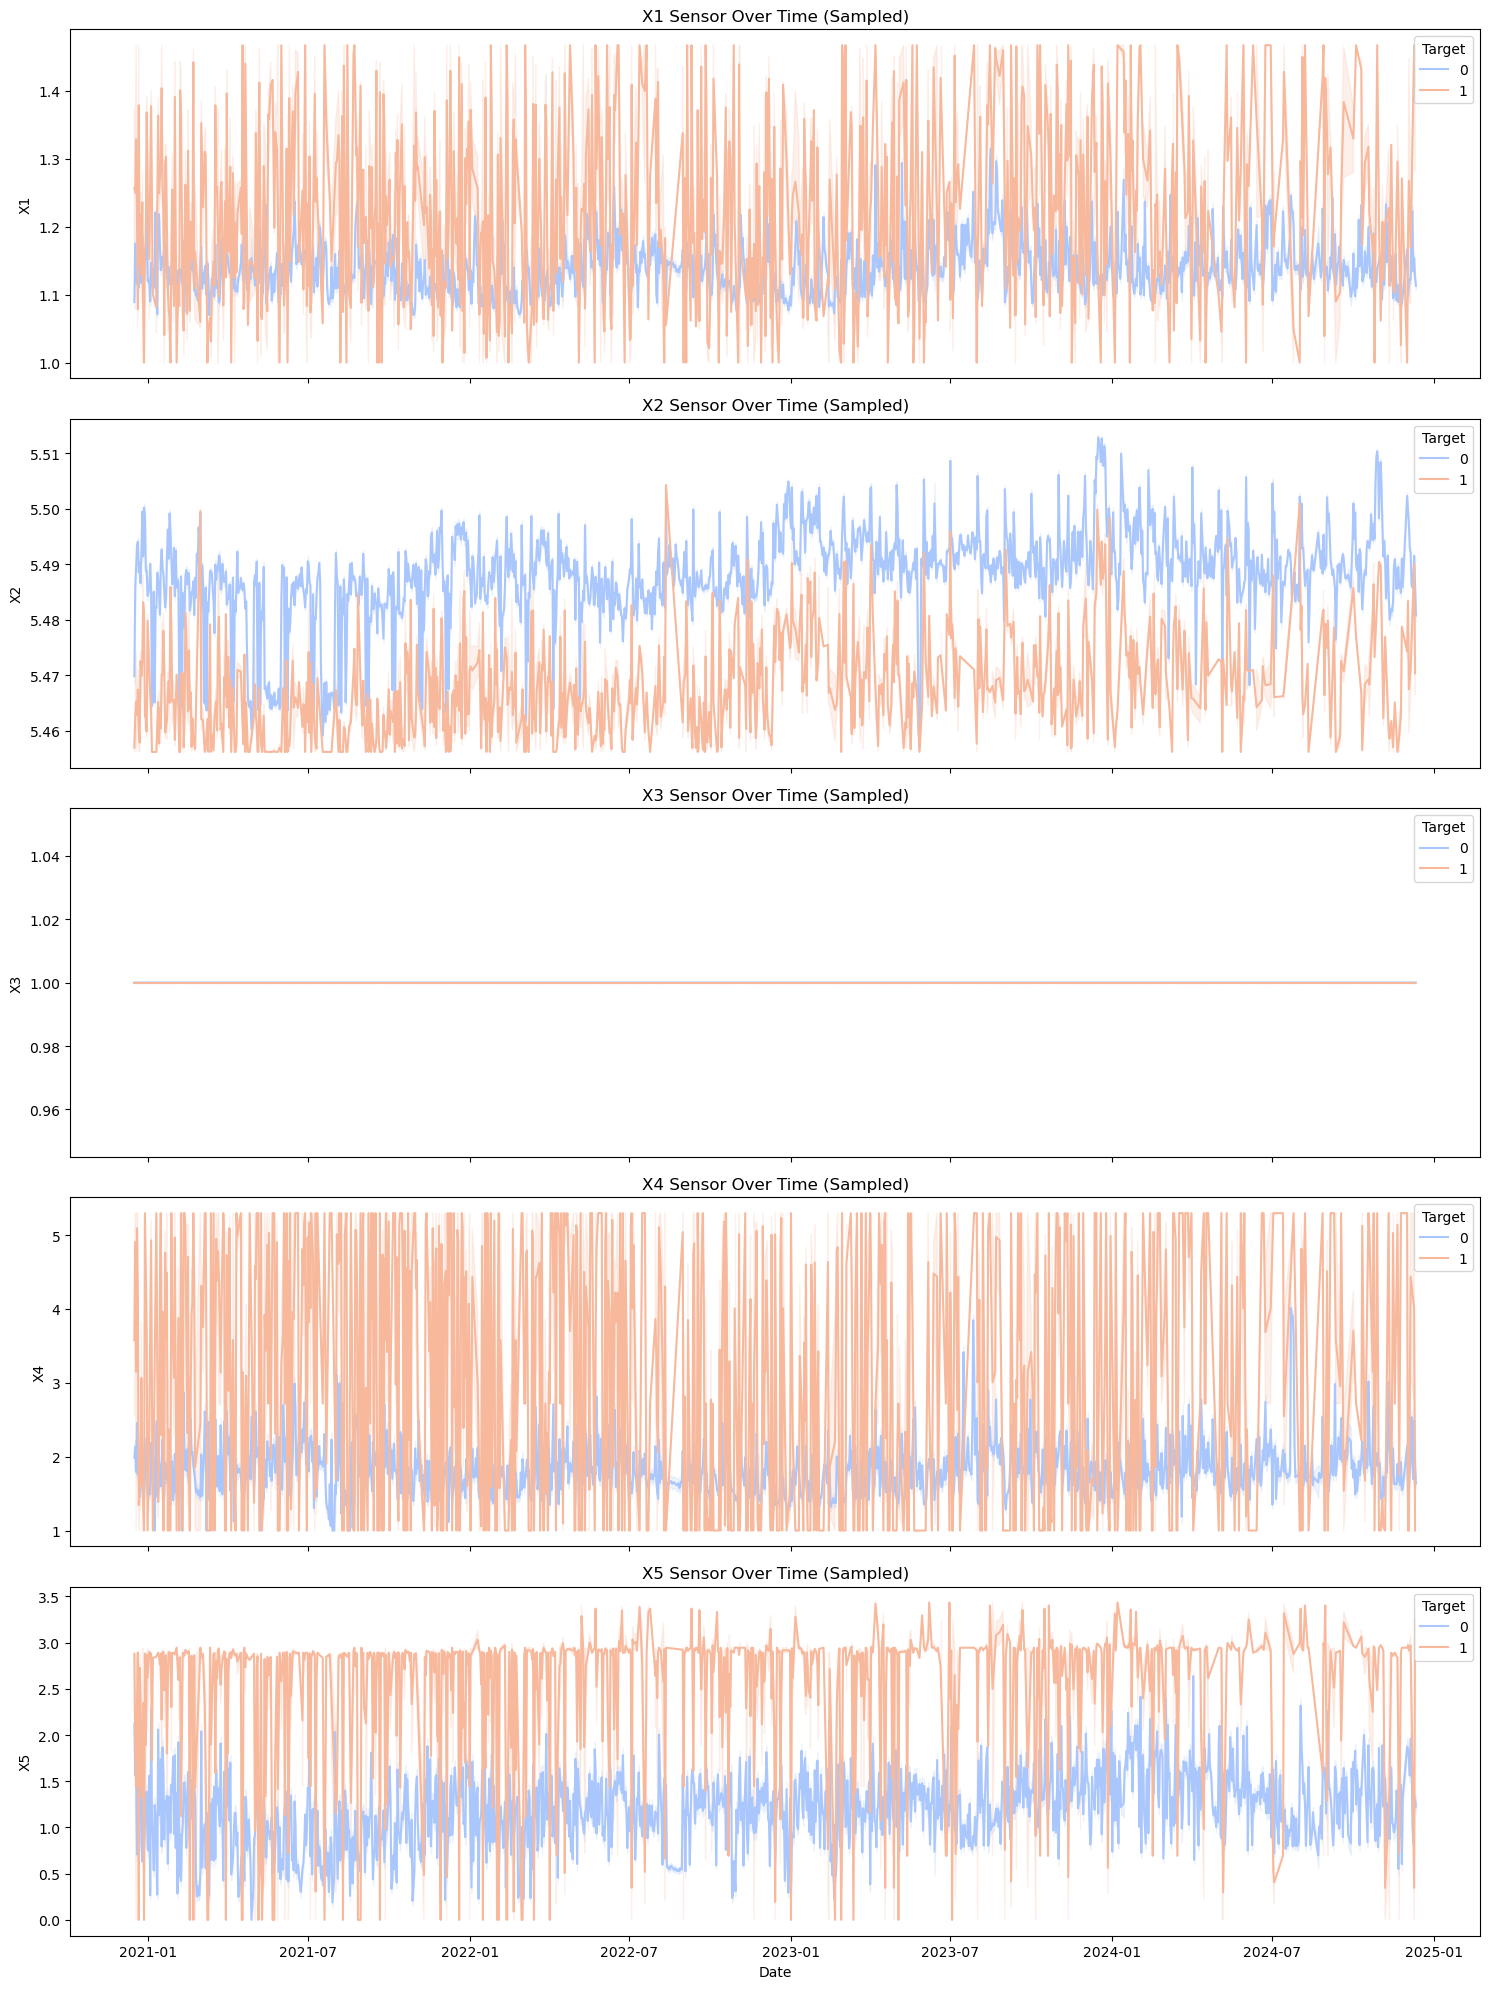

In [111]:
sensors = ['X1', 'X2', 'X3', 'X4', 'X5']

fig, axs = plt.subplots(len(sensors), 1, figsize=(15, 20), sharex=True)

for i, sensor in enumerate(sensors):
    sns.lineplot(x='Date',
                 y=sensor, data=df, hue='target', palette='coolwarm', ax=axs[i])
    axs[i].set_title(f"{sensor} Sensor Over Time (Sampled)")
    axs[i].legend(title='Target', loc='upper right')

plt.tight_layout()
plt.show()

## Checking skewness and kurtosis for each column numerically

In [113]:
for col in sensors:
    skewness = df[col].skew()
    kurt = df[col].kurt()
    print(f"{col} ➤ Skewness: {skewness:.2f}, Kurtosis: {kurt:.2f}")


X1 ➤ Skewness: 0.93, Kurtosis: 0.24
X2 ➤ Skewness: -0.21, Kurtosis: 0.05
X3 ➤ Skewness: 0.00, Kurtosis: 0.00
X4 ➤ Skewness: 1.59, Kurtosis: 1.17
X5 ➤ Skewness: 0.48, Kurtosis: -1.61


C:\Users\ayush\AppData\Local\Temp\ipykernel_15652\3236571800.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df, palette='Set2')
C:\Users\ayush\AppData\Local\Temp\ipykernel_15652\3236571800.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df, palette='Set2')
C:\Users\ayush\AppData\Local\Temp\ipykernel_15652\3236571800.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df, palette='Set2')
C:\Users\ayush\AppData\Local\Temp\ipykernel_15652\3236571800.py:4: FutureWar

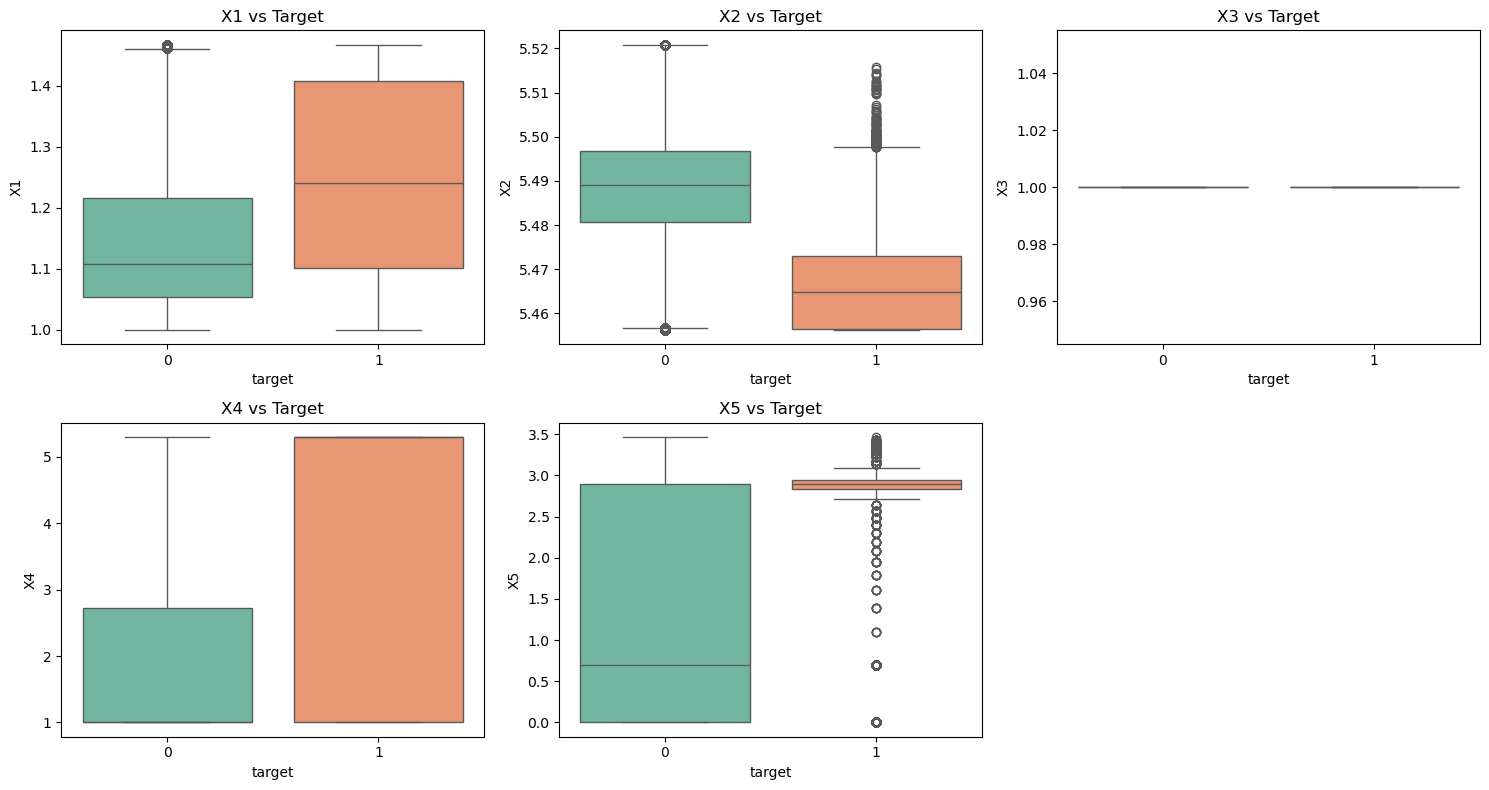

In [115]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(sensors):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='target', y=col, data=df, palette='Set2')
    plt.title(f'{col} vs Target')
plt.tight_layout()
plt.show()


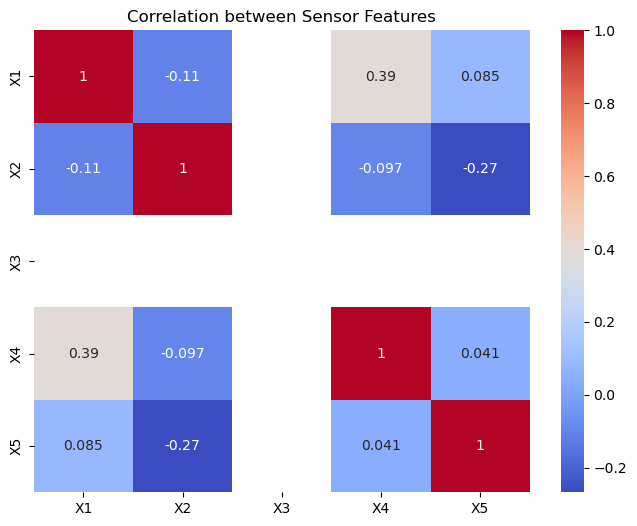

In [117]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[sensors].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Sensor Features")
plt.show()


C:\Users\ayush\AppData\Local\Temp\ipykernel_15652\4181120353.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='pastel')


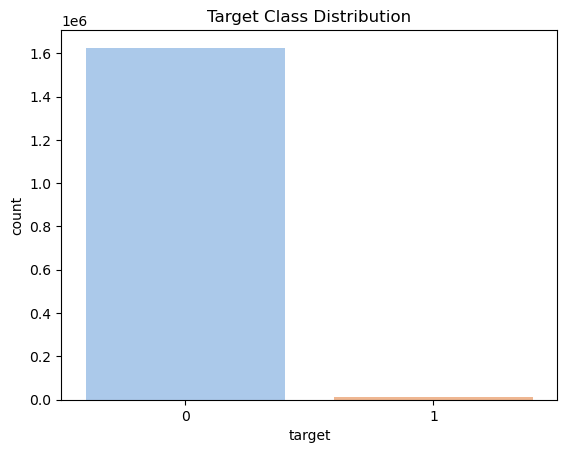

In [43]:
sns.countplot(x='target', data=df, palette='pastel')
plt.title("Target Class Distribution")
plt.show()


In [45]:
df.duplicated(keep = False).sum()  # Total fully duplicated rows

108384

In [47]:
duplicate_rows = df[df.duplicated(keep=False)]
print(duplicate_rows['target'].value_counts())


target
0    108374
1        10
Name: count, dtype: int64


In [49]:
df_sorted = df.sort_values('Date')
dupes_sorted = df_sorted[df_sorted.duplicated(keep=False)]
dupes_sorted.head(10)

,Date,X1,X2,X3,X4,X5,target
119,2020-12-16,1.168826,5.454637,1.0,2.718282,2.890372,0
109,2020-12-16,1.168826,5.454637,1.0,2.718282,2.890372,0
923,2020-12-17,1.114048,5.486787,1.0,1.000000,2.944439,0
932,2020-12-17,1.114048,5.486787,1.0,1.000000,2.944439,0
1394,2020-12-17,1.000000,5.505535,1.0,1.000000,0.000000,0
1392,2020-12-17,1.000000,5.505291,1.0,1.000000,0.000000,0
467,2020-12-17,1.000000,5.500605,1.0,1.000000,0.000000,0
464,2020-12-17,1.000000,5.500156,1.0,1.000000,0.000000,0
460,2020-12-17,1.000000,5.507524,1.0,1.000000,0.000000,0
510,2020-12-17,1.000000,5.500156,1.0,1.000000,0.000000,0


In [51]:
df = df.drop_duplicates().reset_index(drop=True)

In [53]:
df.duplicated().sum()

0

In [54]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['dayofweek'] = df['Date'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

In [57]:
df

,Date,X1,X2,X3,X4,X5,target,year,month,day,dayofweek,weekend
0,2020-12-16,1.518921,5.463154,1.0,2.718282,2.890372,0,2020,12,16,2,0
1,2020-12-16,1.546509,5.458010,1.0,2.718282,2.833213,1,2020,12,16,2,0
2,2020-12-16,1.645427,5.456560,1.0,7.389056,2.890372,1,2020,12,16,2,0
3,2020-12-16,1.652022,5.458479,1.0,2.718282,2.890372,1,2020,12,16,2,0
4,2020-12-16,1.695538,5.466709,1.0,2.718282,2.890372,0,2020,12,16,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1582104,2024-11-26,1.000000,5.482346,1.0,1.000000,0.000000,0,2024,11,26,1,0
1582105,2024-11-26,1.000000,5.486580,1.0,1.000000,0.000000,0,2024,11,26,1,0
1582106,2024-11-26,1.000000,5.484797,1.0,1.000000,0.000000,0,2024,11,26,1,0
1582107,2024-11-26,1.000000,5.483551,1.0,1.000000,0.000000,0,2024,11,26,1,0


In [59]:
df["weekend"].value_counts()

weekend
0    1128293
1     453816
Name: count, dtype: int64

In [61]:
# pip install git+https://github.com/scikit-learn-contrib/imbalanced-learn.git

In [63]:
# def remove_outliers_iqr(df, columns):
#     df_clean = df.copy()
#     for col in columns:
#         Q1 = df_clean[col].quantile(0.25)
#         Q3 = df_clean[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         # Keep only data within bounds
#         df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
#     return df_clean

# # Specify sensor columns
# sensor_cols = ['X1', 'X2', 'X3', 'X4', 'X5']

# # Apply outlier removal
# df_no_outliers = remove_outliers_iqr(df, sensor_cols)

# # Shape before and after
# print("Before removing outliers:", df.shape)
# print("After removing outliers:", df_no_outliers.shape)


In [65]:
#IQR method (capping)
for col in ['X1', 'X2', 'X3', 'X4', 'X5']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower, upper)

In [67]:
df

,Date,X1,X2,X3,X4,X5,target,year,month,day,dayofweek,weekend
0,2020-12-16,1.467342,5.463154,1.0,2.718282,2.890372,0,2020,12,16,2,0
1,2020-12-16,1.467342,5.458010,1.0,2.718282,2.833213,1,2020,12,16,2,0
2,2020-12-16,1.467342,5.456560,1.0,5.295705,2.890372,1,2020,12,16,2,0
3,2020-12-16,1.467342,5.458479,1.0,2.718282,2.890372,1,2020,12,16,2,0
4,2020-12-16,1.467342,5.466709,1.0,2.718282,2.890372,0,2020,12,16,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1582104,2024-11-26,1.000000,5.482346,1.0,1.000000,0.000000,0,2024,11,26,1,0
1582105,2024-11-26,1.000000,5.486580,1.0,1.000000,0.000000,0,2024,11,26,1,0
1582106,2024-11-26,1.000000,5.484797,1.0,1.000000,0.000000,0,2024,11,26,1,0
1582107,2024-11-26,1.000000,5.483551,1.0,1.000000,0.000000,0,2024,11,26,1,0


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from imblearn.combine import SMOTETomek
import pandas as pd
from collections import Counter
X = df.drop("target", axis=1)
y = df["target"]

# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=42)

In [77]:
X_train.dtypes


Date         datetime64[ns]
X1                  float64
X2                  float64
X3                  float64
X4                  float64
X5                  float64
year                  int32
month                 int32
day                   int32
dayofweek             int32
weekend               int64
dtype: object

In [79]:
from sklearn.preprocessing import RobustScaler

# Drop the datetime column
X_train = X_train.drop(columns=['Date'])
X_test = X_test.drop(columns=['Date'])

# RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
# Apply SMOTETomek

print("Before resampling:", Counter(y_train))

smote_tomek = SMOTETomek(random_state=42, n_jobs = -1)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train_scaled, y_train.astype(int))

print("After resampling:", Counter(y_resampled))


Before resampling: Counter({0: 1254461, 1: 11226})
After resampling: Counter({0: 1253377, 1: 1253377})


In [85]:
# pip install xgboost

In [87]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import f1_score


In [95]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }

    model = XGBClassifier(**params)

    scores = cross_val_score(model, X_resampled, y_resampled, scoring='f1', cv=3)

    return scores.mean()


In [97]:
# Run Optuna optimization
study = optuna.create_study(direction="maximize", sampler= optuna.samplers.TPESampler())

[I 2025-04-10 00:53:53,964] A new study created in memory with name: no-name-54f16b4f-aef1-4c47-bac1-0201e06678fa


In [101]:
study.optimize(objective, n_trials=20,n_jobs=-1)

[I 2025-04-10 01:29:13,192] Trial 10 finished with value: 0.9230065412260188 and parameters: {'n_estimators': 101, 'max_depth': 12, 'learning_rate': 0.02140916717841715, 'subsample': 0.8546039459304231, 'colsample_bytree': 0.5050942915344728, 'gamma': 1.2117094718725672, 'reg_alpha': 4.668732289239967, 'reg_lambda': 0.28404714587972535, 'scale_pos_weight': 9.938820201965887}. Best is trial 7 with value: 0.9897494076951722.
[I 2025-04-10 01:29:41,487] Trial 12 finished with value: 0.9210579802674806 and parameters: {'n_estimators': 116, 'max_depth': 12, 'learning_rate': 0.017822279186385848, 'subsample': 0.8353653003400041, 'colsample_bytree': 0.5080465963683889, 'gamma': 1.3408304563156725, 'reg_alpha': 4.9303732711265855, 'reg_lambda': 0.20530741097648963, 'scale_pos_weight': 9.491459957015937}. Best is trial 7 with value: 0.9897494076951722.
[I 2025-04-10 01:29:53,261] Trial 15 finished with value: 0.9116502676350061 and parameters: {'n_estimators': 110, 'max_depth': 12, 'learning_ra

In [103]:
study.best_trial

FrozenTrial(number=29, state=1, values=[0.9964849023760379], datetime_start=datetime.datetime(2025, 4, 10, 2, 23, 53, 299979), datetime_complete=datetime.datetime(2025, 4, 10, 2, 53, 23, 909918), params={'n_estimators': 901, 'max_depth': 10, 'learning_rate': 0.2930013963776803, 'subsample': 0.9162134031258449, 'colsample_bytree': 0.9943256740348546, 'gamma': 0.037678015680783564, 'reg_alpha': 0.12145964278906192, 'reg_lambda': 4.1624943369455725, 'scale_pos_weight': 1.1279082394894795}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=1000, log=False, low=100, step=1), 'max_depth': IntDistribution(high=12, log=False, low=3, step=1), 'learning_rate': FloatDistribution(high=0.3, log=False, low=0.01, step=None), 'subsample': FloatDistribution(high=1.0, log=False, low=0.5, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.5, step=None), 'gamma': FloatDistribution(high=5.0, log=False, low=0.0, step=None), 

In [105]:
study.best_params

{'n_estimators': 901,
 'max_depth': 10,
 'learning_rate': 0.2930013963776803,
 'subsample': 0.9162134031258449,
 'colsample_bytree': 0.9943256740348546,
 'gamma': 0.037678015680783564,
 'reg_alpha': 0.12145964278906192,
 'reg_lambda': 4.1624943369455725,
 'scale_pos_weight': 1.1279082394894795}

In [107]:
study.best_value

0.9964849023760379

In [145]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    f1_score,
    accuracy_score
)

final_model = XGBClassifier(
    n_estimators=901,
    max_depth=10,
    learning_rate=0.2930013963776803,
    subsample=0.9162134031258449,
    colsample_bytree=0.9943256740348546,
    gamma=0.037678015680783564,
    reg_alpha=0.12145964278906192,
    reg_lambda=4.1624943369455725,
    scale_pos_weight=1.1279082394894795,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

final_model.fit(X_resampled, y_resampled)

y_pred = final_model.predict(X_test_scaled)
y_proba = final_model.predict_proba(X_test_scaled)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


C:\Users\ayush\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:29:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    313615
           1       0.53      0.70      0.60      2807

    accuracy                           0.99    316422
   macro avg       0.76      0.85      0.80    316422
weighted avg       0.99      0.99      0.99    316422

Confusion Matrix:
 [[311884   1731]
 [   851   1956]]
Accuracy: 0.9918400111243846
F1 Score: 0.6024022174314753
ROC-AUC Score: 0.9858493915441092


In [149]:
test_df = pd.read_parquet("test.parquet")

In [151]:
test_df

,ID,Date,X1,X2,X3,X4,X5
0,0,2020-12-16,1.685395,5.463917,1.0,7.389056,2.890372
1,1,2020-12-16,1.488844,5.454936,1.0,7.389056,2.890372
2,2,2020-12-16,1.164160,5.471136,1.0,1.000000,2.890372
3,3,2020-12-16,1.000000,5.467385,1.0,1.000000,2.890372
4,4,2020-12-16,1.000000,5.453995,1.0,1.000000,2.833213
...,...,...,...,...,...,...,...
409851,409851,2024-11-26,1.120752,5.483053,1.0,2.718282,0.000000
409852,409852,2024-11-26,1.096365,5.477802,1.0,7.389056,0.000000
409853,409853,2024-11-26,1.111822,5.479972,1.0,2.718282,0.000000
409854,409854,2024-11-26,1.000000,5.486165,1.0,1.000000,0.000000


In [159]:
features = ['X1', 'X2', 'X3', 'X4', 'X5']


In [161]:
# Extract features
X_test = test_df[features]

In [165]:
# Fit scaler on training data
robust_scaler = RobustScaler()
X_train_scaled = robust_scaler.fit_transform(X_train)

In [172]:
test_df['Date'] = pd.to_datetime(test_df['Date'])
test_df['year'] = test_df['Date'].dt.year
test_df['month'] = test_df['Date'].dt.month
test_df['day'] = test_df['Date'].dt.day
test_df['dayofweek'] = test_df['Date'].dt.dayofweek
test_df['weekend'] = (test_df['Date'].dt.dayofweek >= 5).astype(int)


In [174]:
X_test = test_df[feature_columns]
X_test_scaled = robust_scaler.transform(X_test)


In [176]:
feature_columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'year', 'month', 'day', 'dayofweek', 'weekend']
X_test = test_df[feature_columns]


In [180]:
X_test_scaled = robust_scaler.transform(X_test)
preds = final_model.predict(X_test_scaled)

In [184]:
submission = pd.DataFrame({
    'ID': test_df['ID'],  # or test_df.index if ID not available
    'target': preds
})

# Save to CSV
submission.to_csv('xgb_predictions.csv', index=False)

print("✅ Predictions saved to xgb_predictions.csv")

✅ Predictions saved to xgb_predictions.csv
